In [81]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import pytz 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ast
import string
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from googletrans import Translator




In [82]:
import pandas as pd
pd.options.display.max_colwidth = 100
import nltk
from nltk.sentiment.util import mark_negation
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import math

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('preprocessing_skripsi.csv')
# above line will be different depending on where you saved your data, and your file name
df.head()


,Unnamed: 0,tweet_preprocessing,sentimen
0,0,kak maaf kendalanya ya kak bella bantu kendala kakak inbox ya kak silakan kakak,negatif
1,1,follow yuk byk hadiah guys,positif
2,2,kak maaf kendalanya ya kak bella bantu kendala kakak inbox ya kak silakan kakak,negatif
3,3,mengajakmu bergabung bukalapak memberikanmu credits rp cek,positif
4,4,tolong nomor dana hangus memutus akun dana,negatif


In [83]:
pd.set_option('display.max_colwidth', None)
df[df['tweet_preprocessing'].isnull()==True]['tweet_preprocessing']

Series([], Name: tweet_preprocessing, dtype: object)

In [84]:
len(df)

870

In [85]:
df.isnull().sum()

Unnamed: 0             0
tweet_preprocessing    0
sentimen               0
dtype: int64

In [86]:
df.shape

(870, 3)

In [87]:
df.tail()

,Unnamed: 0,tweet_preprocessing,sentimen
865,865,kak mohon maaf kakak transaksi hubungâ,negatif
866,866,yg sms bukalapak,negatif
867,867,terimakasih infonyaðÿ ðÿ,positif
868,868,ketipu untung keburu curiga ikutin petunjuk pelapak teruâ,positif
869,869,rt twitter please do your magic gue tau akun gue tolong retweet tau yg ketipu â,negatif


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           870 non-null    int64 
 1   tweet_preprocessing  870 non-null    object
 2   sentimen             870 non-null    object
dtypes: int64(1), object(2)
memory usage: 20.5+ KB


In [89]:
df.isnull().sum()

Unnamed: 0             0
tweet_preprocessing    0
sentimen               0
dtype: int64

In [90]:
df.dropna(inplace=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 0 to 869
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           870 non-null    int64 
 1   tweet_preprocessing  870 non-null    object
 2   sentimen             870 non-null    object
dtypes: int64(1), object(2)
memory usage: 27.2+ KB


In [92]:
df.shape

(870, 3)

In [93]:
df.isnull().sum()

Unnamed: 0             0
tweet_preprocessing    0
sentimen               0
dtype: int64

In [94]:
def trans(x,src):
    translator = Translator()
    try:
        sentence = translator.translate(x, src=src,dest='id').text
    except:
        sentence = x
    return sentence

In [95]:
tweet = df['tweet_preprocessing'].copy()

In [96]:
pd.set_option('display.max_colwidth', 100)
tweet.tail(15)

855                    investasi reksadana mudah risiko kerugiannya suka investasi reksadana awalâ 
856                                       kak kendala bukalapak tinggal colek mimin bella ya ðÿ jbt
857                rt twitter please do your magic gue tau akun gue tolong retweet tau yg ketipu â 
858                                                   kak ya kendala bukalapak hubungi bella ðÿ jbt
859              tampilan e com yg bikin pusing bukalapak zilingoooo ampun pusing bener cari barang
860                                                       notif bukalapak ngeri sehari puluhan kali
861                                   mbok kiro gojek toped bukalapak iku duduk garapane milenial a
862                                                    transaksi okt clear no resinya resi sms tsb 
863    permisi share ready stock tokyobike cari city bike kids bike more coming soon terima kasihâ 
864                      hai kak maaf nyaman ya kak terkait pemberitahuan aplikasi bukalapak kamuâ 


In [145]:
def repair_exaggeration(x):
    word_tokens = word_tokenize(x)
    new_x =''
    for i in word_tokens:
        if (i =='belanja'):
            new = re.sub(r'(\w)\1\1+',r'\1\1',i)
            new_x = new_x +new+' '
        elif(i =='belanj'):
            new = 'belanja'
            new_x = new_x +new+' '
        else:
            new = re.sub(r'(\w)\1\1\1+',r'\1',i)
            new_x = new_x +new+' '
    return new_x

def del_word(x,key_list):
    n = len(key_list)
    word_tokens = word_tokenize(x)
    new_x =''
    for word in word_tokens:
        if word not in key_list:
            new_x = new_x+word+' '
    return new_x

def clean_tweets(tweet):
   # nltk.download('stopwords')
    my_file = open("combined_stop_words.txt", "r")
    content = my_file.read()
    stop_words = content.split("\n")
    file_2  = open("update_combined_slang_words.txt", "r")
    content2 = file_2.read()
    slang_words = ast.literal_eval(content2)
    my_file.close()
    file_2.close()

    tweet = tweet.lower()
    #after tweepy preprocessing the colon left remain after removing mentions
    #or RT sign in the beginning of the tweet
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)

    #remove emojis from tweet
    #tweet = emoji_pattern.sub(r'', tweet)
    
    #remove punctuation manually
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    
    #remove tags
    tweet=re.sub("&lt;/?.*?&gt;","&lt;&gt;",tweet)
    
    #remove digits and special chars
    tweet=re.sub("(\\d|\\W)+"," ",tweet)

    #remove other symbol from tweet
    tweet = re.sub(r'â', '', 'tweet')
    tweet = re.sub(r'€', '', 'tweet')
    tweet = re.sub(r'¦', '', 'tweet')
    tweet = re.sub(r'rt', '', 'tweet')

    word_tokens = word_tokenize(tweet)
    for w in word_tokens:
        if w in slang_words.keys():
            word_tokens[word_tokens.index(w)] = slang_words[w]

    #filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []

    #looping through conditions
    for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in string.punctuation:
            filtered_tweet.append(w.lower())
    return ' '.join(filtered_tweet)

def count_words(x):
    words = word_tokenize(x)
    n=len(words)
    return n

In [146]:
tweet_exag = tweet.apply(lambda x: repair_exaggeration(x))

In [147]:
tweet_exag.tail(15)

855                    investasi reksadana mudah risiko kerugiannya suka investasi reksadana awalâ 
856                                      kak kendala bukalapak tinggal colek mimin bella ya ðÿ jbt 
857                rt twitter please do your magic gue tau akun gue tolong retweet tau yg ketipu â 
858                                                  kak ya kendala bukalapak hubungi bella ðÿ jbt 
859                tampilan e com yg bikin pusing bukalapak zilingo ampun pusing bener cari barang 
860                                                      notif bukalapak ngeri sehari puluhan kali 
861                                  mbok kiro gojek toped bukalapak iku duduk garapane milenial a 
862                                                    transaksi okt clear no resinya resi sms tsb 
863    permisi share ready stock tokyobike cari city bike kids bike more coming soon terima kasihâ 
864                      hai kak maaf nyaman ya kak terkait pemberitahuan aplikasi bukalapak kamuâ 


In [148]:
keyword = ['ðÿ','rprb','rt','dâ','pelaâ','retweet','awalâ','ðÿ','â','ðÿ','â','rt']
clean_text_extra = tweet.apply(lambda x: del_word(x,keyword))


In [149]:
clean_text_extra.head(15)

0                     kak maaf kendalanya ya kak bella bantu kendala kakak inbox ya kak silakan kakak 
1                                                                          follow yuk byk hadiah guys 
2                     kak maaf kendalanya ya kak bella bantu kendala kakak inbox ya kak silakan kakak 
3                                          mengajakmu bergabung bukalapak memberikanmu credits rp cek 
4                                                          tolong nomor dana hangus memutus akun dana 
5                                                       belanja pengiriman pakai jasa terimakasih jnt 
6                                    malam min knp ga login ya padhal udah bener sms kode bener gagal 
7                                                                              tolong balas dmnya yaa 
8     hi kak maaf kendalanya ya kak bella bantu inbox ya kak kendalanya silakan kakak cek inbox kakak 
9               gratisan pake kode ongkirgratis pas belanja bukalapak bia

In [150]:
df['tweet'] = clean_text_extra

In [151]:
df['word_length'] = df['tweet'].apply(lambda x:count_words(x))

In [152]:
df['word_length'].value_counts().sort_index()

1       5
2      15
3      35
4      40
5      80
6      68
7     108
8      78
9      69
10     70
11     89
12     67
13     81
14     38
15     17
16      9
17      1
Name: word_length, dtype: int64

In [153]:
df = df.drop(df[df['word_length']==0].index,axis=0)
df = df.reset_index(drop=True)

In [154]:
word_dict = {}
for i in range(0,len(df['tweet'])):
    sentence = df['tweet'][i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [155]:
len(word_dict)

1422

In [156]:
len({k:v for (k,v) in word_dict.items() if v < 4})

1043

In [157]:
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('modified_full_lexicon.csv')
lexicon = lexicon.drop(lexicon[(lexicon['word'] == 'bukan')
                               |(lexicon['word'] == 'tidak')
                               |(lexicon['word'] == 'ga')|(lexicon['word'] == 'gk') ].index,axis=0)
lexicon = lexicon.reset_index(drop=True)

In [158]:
len(lexicon)

10248

In [159]:
lexicon.head(10)

,word,weight,number_of_words
0,hai,3,1
1,merekam,2,1
2,ekstensif,3,1
3,paripurna,1,1
4,detail,2,1
5,pernik,3,1
6,belas,2,1
7,welas,4,1
8,kabung,1,1
9,rahayu,4,1


In [160]:
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']

In [161]:
len(lexicon_word)

10248

In [162]:
ns_words = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for word in word_dict.keys():
    if word not in lexicon_word:
        kata_dasar = stemmer.stem(word)
        if kata_dasar not in lexicon_word:
            ns_words.append(word)
len(ns_words)

911

In [163]:
len({k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3)) })

209

In [164]:
ns_words_list = {k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3))}

In [165]:
sort_orders = sorted(ns_words_list.items(), key=lambda x: x[1], reverse=True)
sort_orders=sort_orders[0:20]
for i in sort_orders:
    print(i[0], i[1])

bukalapak 353
kak 229
bella 76
kendala 73
pake 63
dm 60
gak 58
kakak 56
yg 56
ongkir 55
udah 53
ongkirgratis 51
maks 48
gue 47
nih 44
kendalanya 39
emas 39
rp 36
min 36
reksadana 35


In [166]:
word_to_plot = df['tweet_preprocessing'].copy()

In [167]:
word_to_plot_1 = word_to_plot.apply(lambda x: del_word(x,negasi))

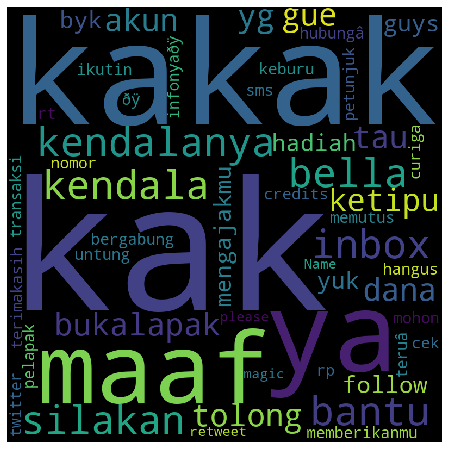

In [168]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000
                      , min_font_size = 20).generate(str(word_to_plot_1))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [169]:
lexicon['number_of_words'].value_counts()

1    9536
2     686
3      24
4       2
Name: number_of_words, dtype: int64

In [170]:
'baiklah' in word_dict

False

In [171]:
'baik' in lexicon_word

True

In [172]:
sencol =[]
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
            
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(df)):
    nsen = senrow.shape[0]
    words = word_tokenize(df['tweet'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)

In [173]:
len(sentiment_list)

870

In [174]:

print(senrow.shape[0])

870


In [175]:
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
df_sen = pd.DataFrame(sentiment_data,columns = sencol)

In [176]:
df_sen.head(10)

,maaf,ya,bantu,silakan,yuk,hadiah,guys,ajak,bergabung,beri,...,typo,lap,sebenernya,cantum,kam,tampilan,ampun,cari,ngeri,sentiment
0,1,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
1,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,1,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
3,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,-5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
8,1,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11


In [177]:

cek_df = pd.DataFrame([])
cek_df['text'] = df['tweet_preprocessing'].copy()
cek_df['sentiment']  = df_sen['sentiment'].copy()

In [178]:
cek_df.head(10)

,text,sentiment
0,kak maaf kendalanya ya kak bella bantu kendala kakak inbox ya kak silakan kakak,14
1,follow yuk byk hadiah guys,9
2,kak maaf kendalanya ya kak bella bantu kendala kakak inbox ya kak silakan kakak,14
3,mengajakmu bergabung bukalapak memberikanmu credits rp cek,-5
4,tolong nomor dana hangus memutus akun dana,11
5,belanja pengiriman pakai jasa terimakasih jnt,6
6,malam min knp ga login ya padhal udah bener sms kode bener gagal,2
7,tolong balas dmnya yaa,4
8,hi kak maaf kendalanya ya kak bella bantu inbox ya kak kendalanya silakan kakak cek inbox kakak,11
9,gratisan pake kode ongkirgratis pas belanja bukalapak biar ongkir gratis maks rprb berlaku,11


In [179]:
df_sen.describe()

,maaf,ya,bantu,silakan,yuk,hadiah,guys,ajak,bergabung,beri,...,typo,lap,sebenernya,cantum,kam,tampilan,ampun,cari,ngeri,sentiment
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,...,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,0.133333,0.185057,0.047126,0.013793,0.066667,0.012644,0.001149,0.028736,0.028736,0.027586,...,0.001149,0.001149,0.001149,0.001149,0.001149,0.001149,0.001149,0.002299,0.001149,4.636782
std,0.340130,0.449019,0.212031,0.116698,0.258644,0.111795,0.033903,0.167159,0.167159,0.163878,...,0.033903,0.033903,0.033903,0.033903,0.033903,0.033903,0.033903,0.047919,0.033903,6.766977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
max,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000


In [180]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

#print("Top Absolute Correlations")
#print(get_top_abs_correlations(df_sen, 10))
au = get_top_abs_correlations(df_sen, 15)

In [181]:
print('Perfect Correlation')
au[au==1]

Perfect Correlation


keburu     curiga      1.0
peristiwa  dunia       1.0
mending    deposito    1.0
gede       bunga       1.0
           deposito    1.0
                      ... 
beliin     mamah       1.0
bertahan   diproses    1.0
novel      import      1.0
kuat       tenaga      1.0
novel      fiksi       1.0
Length: 91, dtype: float64

In [182]:
top10 = au[au<float(1)][0:10]
label = top10.index
label_list =[]
for i in label:
    for j in i:
        if(j not in label_list):
            label_list.append(j)
            
df_sen_corr = df_sen[label_list]
corr = df_sen_corr.corr()
for i in label_list:
    for j in label_list:
        if i!=j:
            corr[i][j] = round(corr[i][j],3)

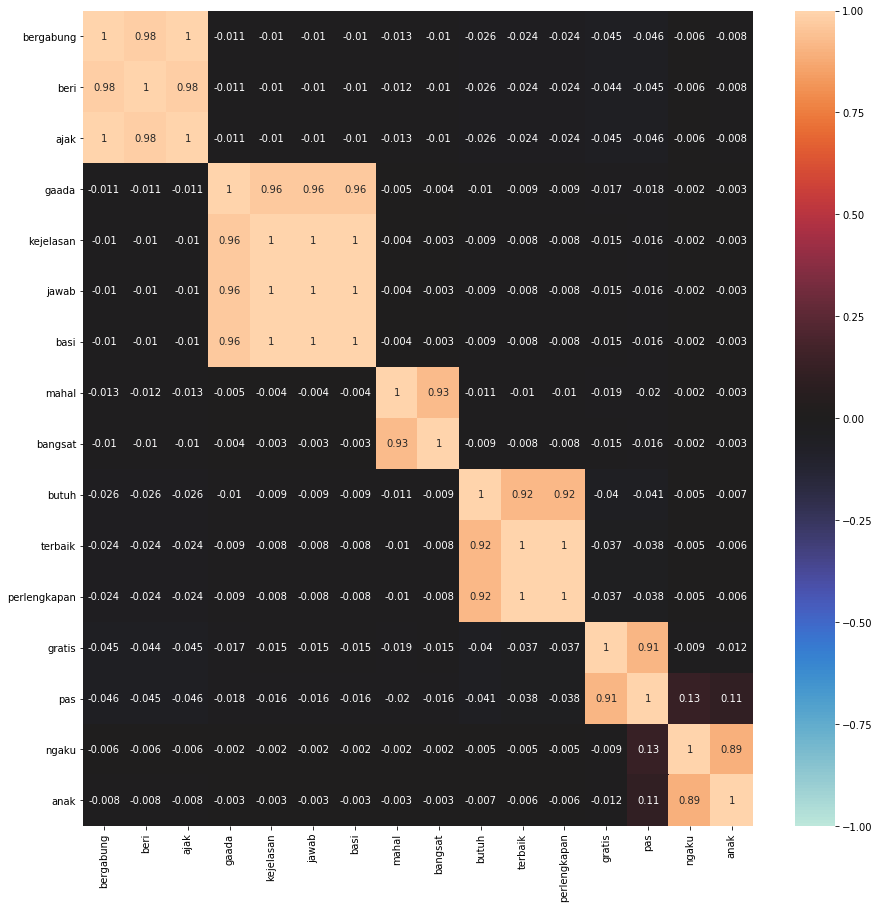

In [183]:
plt.figure(figsize=(15,15))

h = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, center= 0)

plt.show()

In [184]:
top15 = au[au<float(1)][0:15]

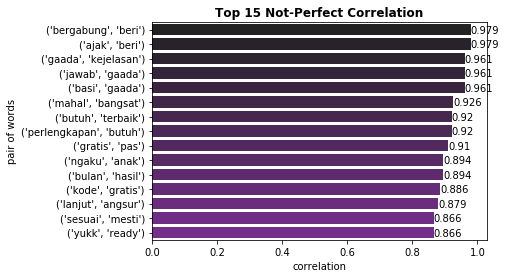

In [185]:
pal =sns.dark_palette("purple", input="xkcd",n_colors=15)
g = sns.barplot(y = top15.index , x = top15,palette=pal)
g.grid=False
plt.xlabel('correlation')
plt.ylabel('pair of words')
plt.title("Top 15 Not-Perfect Correlation",fontweight='bold') 
for i in range(15):
    g.text(top15[i],i+0.22, round(top15[i],3),color='black')
plt.show()

In [186]:
top15_word = df_sen.drop(['sentiment'],axis=1).sum().sort_values(ascending=False)[0:15]

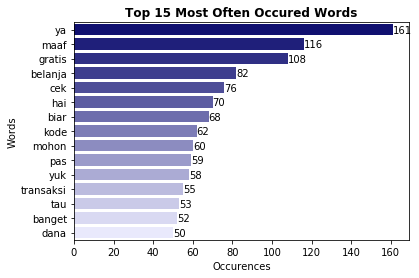

In [187]:
#pal =sns.dark_palette("purple", input="xkcd",n_colors=15)
pal =sns.light_palette("navy", reverse=True,n_colors=15)
g = sns.barplot(y = top15_word.index , x = top15_word,palette=pal)
g.grid(False)
plt.xlabel('Occurences')
plt.ylabel('Words')
plt.title("Top 15 Most Often Occured Words",fontweight='bold') 
for i in range(15):
    g.text(top15_word[i],i+0.22, top15_word[i],color='black')
plt.show()

In [188]:
df['sentiment'] = df_sen['sentiment']

In [189]:
df.head(800)

,Unnamed: 0,tweet_preprocessing,sentimen,tweet,word_length,sentiment
0,0,kak maaf kendalanya ya kak bella bantu kendala kakak inbox ya kak silakan kakak,negatif,kak maaf kendalanya ya kak bella bantu kendala kakak inbox ya kak silakan kakak,14,14
1,1,follow yuk byk hadiah guys,positif,follow yuk byk hadiah guys,5,9
2,2,kak maaf kendalanya ya kak bella bantu kendala kakak inbox ya kak silakan kakak,negatif,kak maaf kendalanya ya kak bella bantu kendala kakak inbox ya kak silakan kakak,14,14
3,3,mengajakmu bergabung bukalapak memberikanmu credits rp cek,positif,mengajakmu bergabung bukalapak memberikanmu credits rp cek,7,-5
4,4,tolong nomor dana hangus memutus akun dana,negatif,tolong nomor dana hangus memutus akun dana,7,11
...,...,...,...,...,...,...
795,795,hai kak mohon maaf yuk pindah dm infokan kendala detail beserta email danâ,positif,hai kak mohon maaf yuk pindah dm infokan kendala detail beserta email danâ,13,13
796,796,tolong dibantu penjualan no pesanan diterima pembeli pembeliâ,negatif,tolong dibantu penjualan no pesanan diterima pembeli pembeliâ,8,14
797,797,waah sih milih investasi emas yah emas harganya cenderung stabil â,negatif,waah sih milih investasi emas yah emas harganya cenderung stabil,10,2
798,798,rt twitter please do your magic gue tau akun gue tolong retweet tau yg ketipu â,positif,twitter please do your magic gue tau akun gue tolong tau yg ketipu,13,-8


In [190]:
# Afinn sentiment LABELING
from afinn import Afinn
af = Afinn()
count_total=0
count_pos=0
count_neut=0

count_neg=0
li_af = []
for i in range(len(df_copy.index)):
    sent = str(df_copy.loc[i]['tweet_preprocessing'])
    if(af.score(sent)>0):
        count_pos=count_pos+1
        count_total=count_total+1
        li_af.append(1)
    elif(af.score(sent)<0):
        count_neg=count_neg+1
        count_total=count_total+1
        li_af.append(-1)
    else:
        li_af.append(0)
        count_total=count_total+1
        count_neut+=1



#         print(df.loc[i]['full_text'])
#         print(sent.sentiment)
print("Total tweets:",len(df_copy.index))
print("Total tweets with sentiment:",count_total)
print("positive tweets:",count_pos)
print("negative tweets:",count_neg)
print("neutral tweets:",count_neut)

Total tweets: 550
Total tweets with sentiment: 550
positive tweets: 26
negative tweets: 5
neutral tweets: 519
